In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import squarify

import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
data0910 = pd.read_csv("dataset/data0910.csv")
data1011 = pd.read_csv("dataset/data1011.csv")

In [3]:
data = pd.concat([data0910, data1011], axis=0)

In [4]:
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1033036 non-null  object 
 1   StockCode    1033036 non-null  object 
 2   Description  1028761 non-null  object 
 3   Quantity     1033036 non-null  int64  
 4   InvoiceDate  1033036 non-null  object 
 5   Price        1033036 non-null  float64
 6   Customer ID  797885 non-null   float64
 7   Country      1033036 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ MB


In [7]:
data = data.dropna()

In [8]:
data['date'] = data['InvoiceDate'].apply(lambda x : x.split()[0])
data['time'] = data['InvoiceDate'].apply(lambda x : x.split()[1])

data['hour'] = data['time'].apply(lambda x : x.split(':')[0])

data['date'] = data['date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)
data['day'] = data['date'].apply(lambda x : x.day)
data ['quarter'] = data['date'].apply(lambda x : x.quarter)
data['weekday'] = data['date'].apply(lambda x : x.day_name())

data['total_price'] = data['Quantity'] * data['Price']

In [9]:
data.describe()

,Quantity,Price,Customer ID,year,month,day,quarter,total_price
count,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777,2010.431108,7.411434,15.387388,2.795019,20.416465
std,191.670371,71.392549,1696.466663,0.568904,3.424495,8.658264,1.132430,313.518824
min,-80995.000000,0.000000,12346.000000,2009.000000,1.000000,1.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13964.000000,2010.000000,5.000000,8.000000,2.000000,4.350000
50%,5.000000,1.950000,15228.000000,2010.000000,8.000000,15.000000,3.000000,11.700000
75%,12.000000,3.750000,16788.000000,2011.000000,10.000000,23.000000,4.000000,19.500000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,4.000000,168469.600000


### Quantity -1 인 이유 
    - 취소된 상품
    - 취소되면 'InvoiceNo'에 C가 붙게됨

In [10]:
tmp = data[data['Quantity'] < 0]

In [11]:
tmp[tmp['Invoice'].str.find("C") == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011-12-09,9:57,9,2011,12,9,4,Friday,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011-12-09,10:28,10,2011,12,9,4,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011-12-09,11:57,11,2011,12,9,4,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011-12-09,11:58,11,2011,12,9,4,Friday,-1.25


In [12]:
data = data[~data["Invoice"].str.contains("C")]
data = data[data["Quantity"] > 0]

### StockCode의 규칙
 - 문자로 이루어진 stockcode는 description도 통일되어 있음

In [13]:
# 문자로만
stockcode = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
stockcode['StockCode'].value_counts()

POST            1803
M                688
C2               248
ADJUST            32
BANK CHARGES      31
PADS              18
DOT               16
TEST001           11
D                  5
ADJUST2            3
SP1002             2
TEST002            1
Name: StockCode, dtype: int64

In [14]:
# stockcode 문자 dropna : 상품에 대한 것이 아니기 때문
data = data[~data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

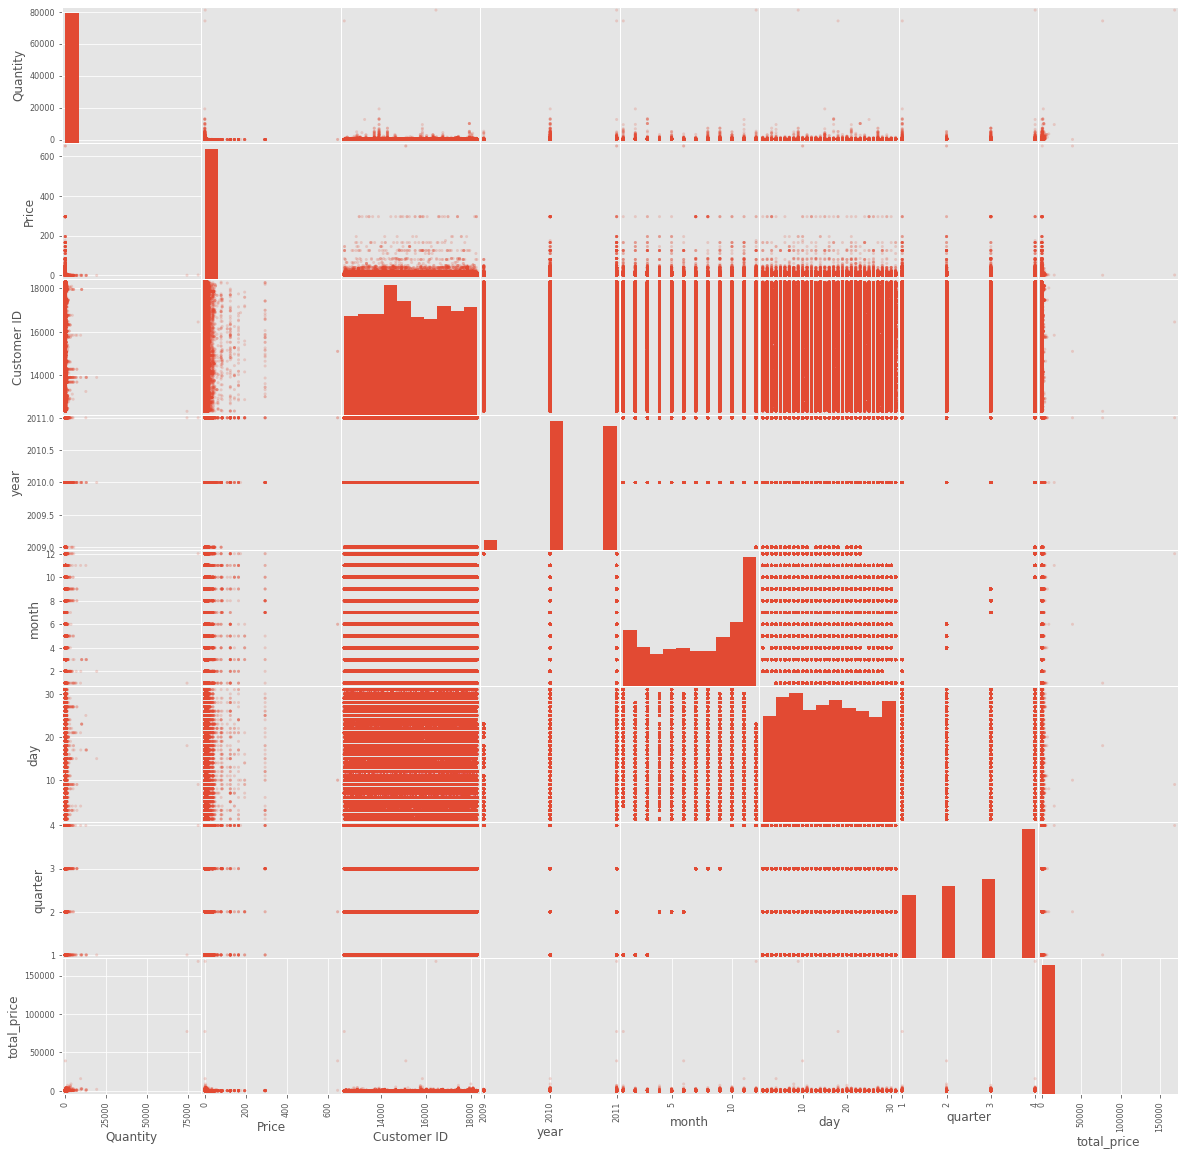

In [15]:
# pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20))
# plt.show();

### revenue

In [16]:
# # 2011년 12월 데이터 삭제 : 전체 달의 데이터가 다 있는게 아니라 9일까지만 있음
# data = data[~((data['year'] == 2011) & (data['month'] == 12))] 

In [17]:
data = data.astype({'year':"string",
                         'quarter' : "string",
                         'month':"string",
                         'day':'string'})

- ARPPU(Average Revenue Per Paying User)
    - ARPPU = total revenue / user

In [18]:
total_revenue = data['total_price'].sum()
total_revenue

17068567.970000006

In [19]:
user = data['Customer ID'].nunique()
user

5853

In [20]:
ARPPU = total_revenue / user
ARPPU

2916.208434990604

- Year ARPPU(Average Revenue Per Paying User)

In [21]:
YARPPU = data.groupby(['year']).sum()['total_price'] / data.groupby(['year']).nunique()['Customer ID']
YARPPU_df = YARPPU.to_frame().reset_index().rename(columns={0 : 'YARPPU'})
YARPPU_df

,year,YARPPU
0,2009,712.845499
1,2010,1954.488423
2,2011,1938.796698


<AxesSubplot:xlabel='year', ylabel='YARPPU'>

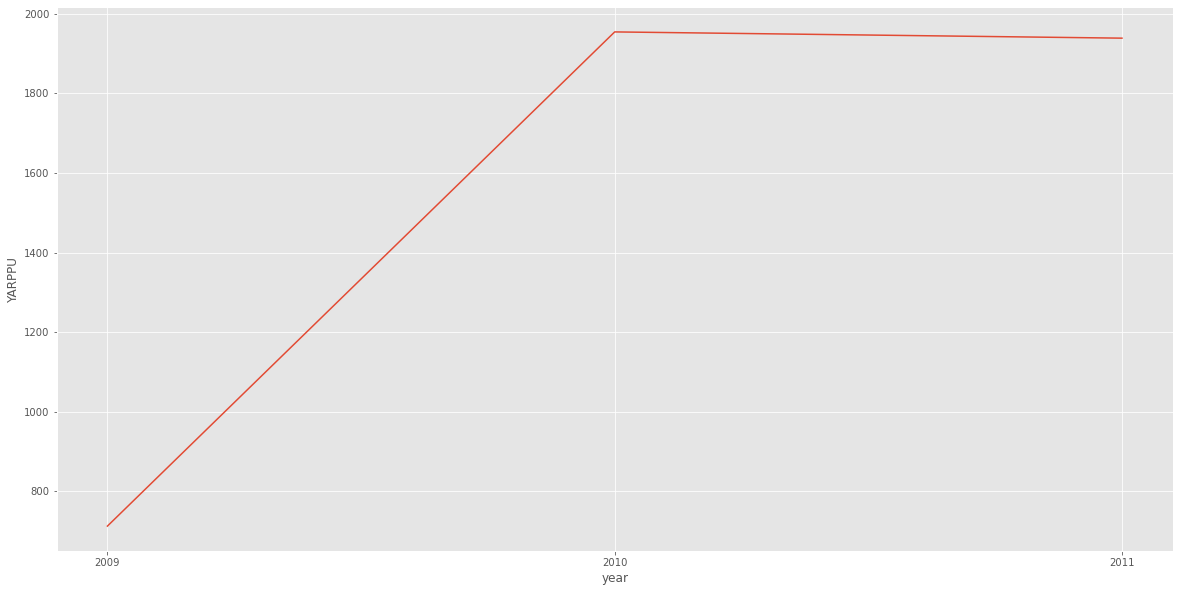

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(x=YARPPU_df['year'], y=YARPPU_df['YARPPU'])

- Quater ARPPU(Average Revenue Per Paying User)

In [23]:
QARPPU = data.groupby(['year', 'quarter']).sum()['total_price'] / data.groupby(['year','quarter']).nunique()['Customer ID']
QARPPU_df = QARPPU.to_frame().reset_index().rename(columns={0 : 'QARPPU'})
QARPPU_df

,year,quarter,QARPPU
0,2009,4,712.845499
1,2010,1,952.116781
2,2010,2,885.623020
3,2010,3,966.159893
4,2010,4,1025.416398
5,2011,1,895.220039
6,2011,2,888.806987
7,2011,3,1005.044455
8,2011,4,1035.581500


<AxesSubplot:xlabel='quarter', ylabel='QARPPU'>

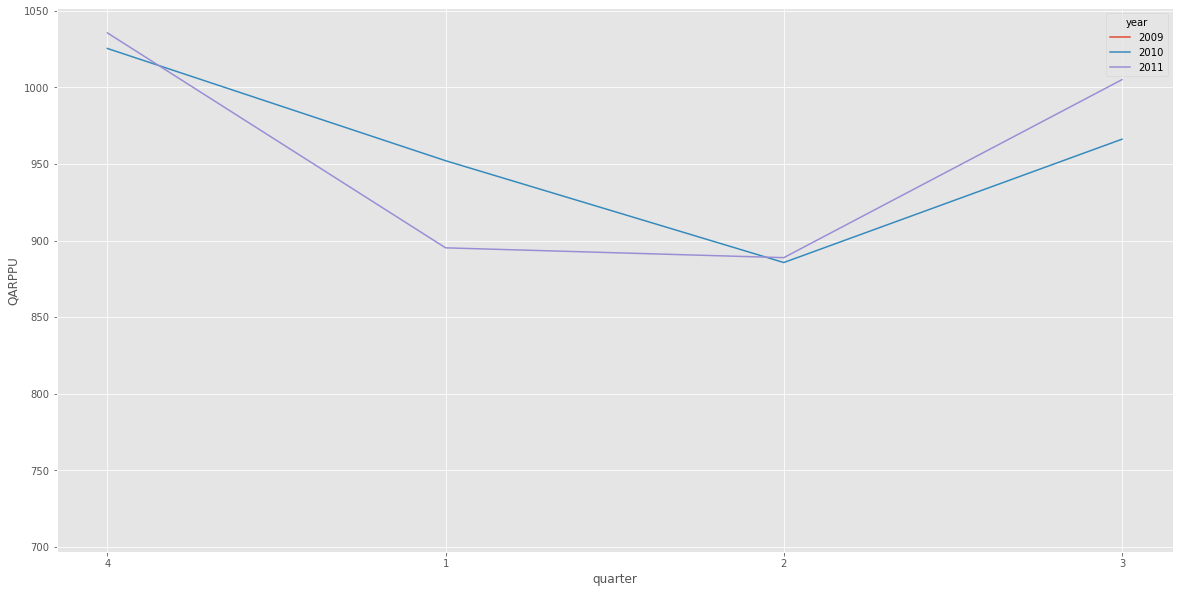

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x=QARPPU_df['quarter'], y=QARPPU_df['QARPPU'], hue=QARPPU_df['year'])

- Monthly ARPPU(Average Revenue Per Paying User)

In [25]:
data = data.astype({'year':"int",
                         'month':"int",
                         'day':'int'})

In [26]:
MARPPU = data.groupby(['year','month']).sum()['total_price'] / data.groupby(['year','month']).nunique()['Customer ID']
MARPPU_df = MARPPU.to_frame().reset_index().rename(columns={0 : 'MARPPU'})
MARPPU_df

,year,month,MARPPU
0,2009,12,712.845499
1,2010,1,761.359458
2,2010,2,645.833424
3,2010,3,633.657155
4,2010,4,623.138903
5,2010,5,614.232259
6,2010,6,608.132882
7,2010,7,629.315974
8,2010,8,653.363923
9,2010,9,709.106347


<AxesSubplot:xlabel='month', ylabel='MARPPU'>

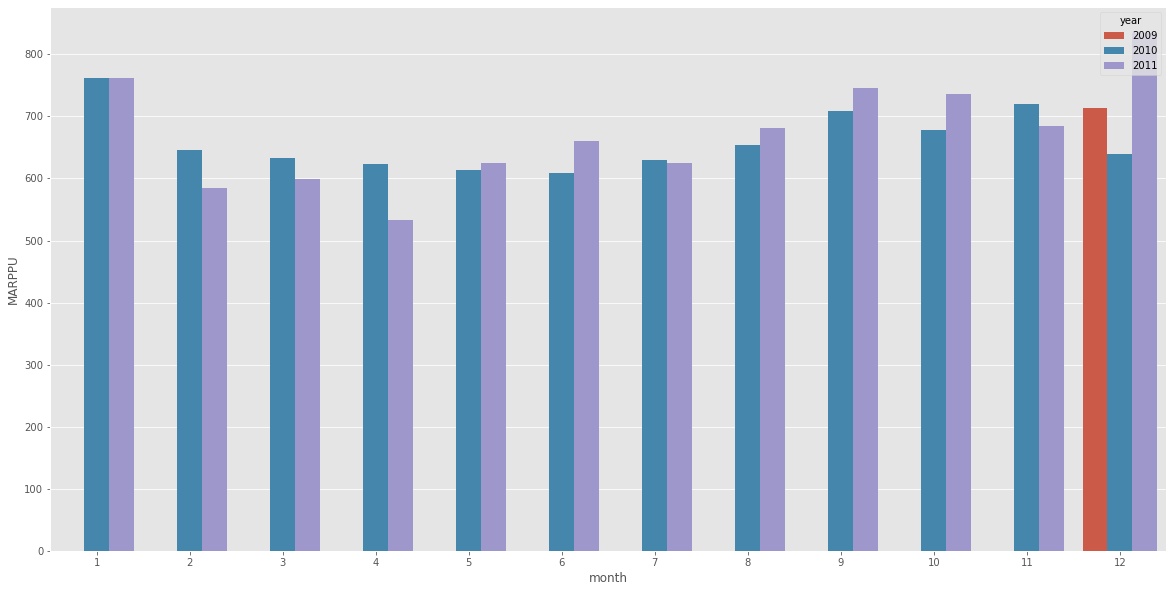

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=MARPPU_df['month'], y=MARPPU_df['MARPPU'], hue=MARPPU_df['year'])

- Daily ARPPU(Average Revenue Per Paying User)

In [28]:
DARPPU = data.groupby(['year','month', 'day']).sum()['total_price'] / data.groupby(['year','month', 'day']).nunique()['Customer ID']
DARPPU_df = DARPPU.to_frame().reset_index().rename(columns={0 : 'DARPU'})

<AxesSubplot:xlabel='day', ylabel='DARPU'>

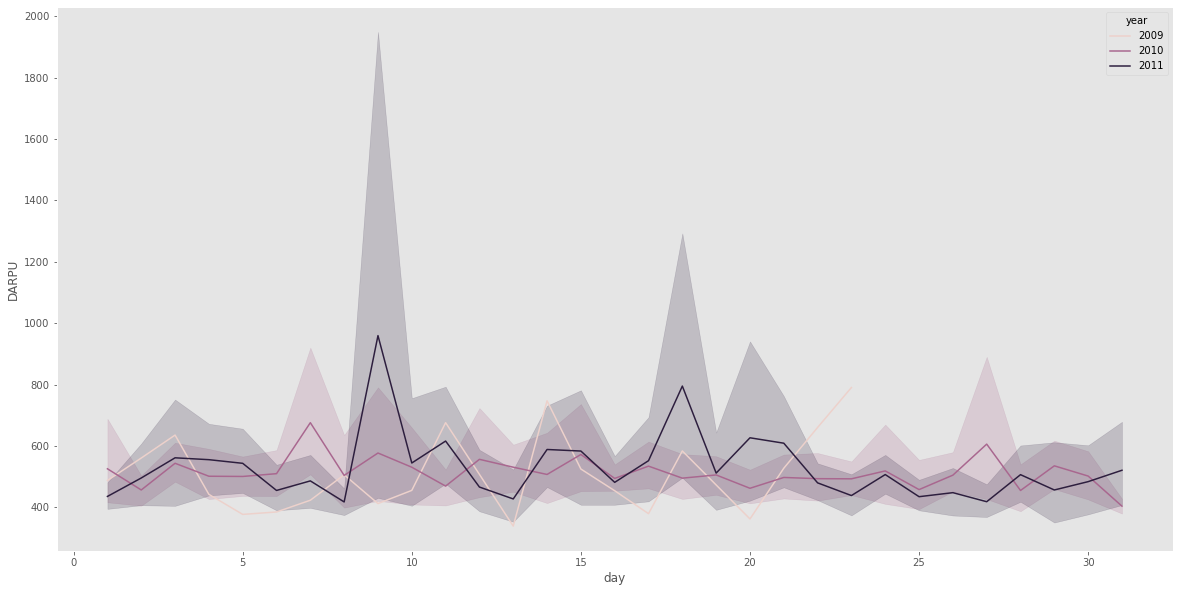

In [29]:
plt.figure(figsize=(20,10))
plt.grid()
sns.lineplot(x=DARPPU_df['day'], y=DARPPU_df['DARPU'], hue=DARPPU_df['year'])

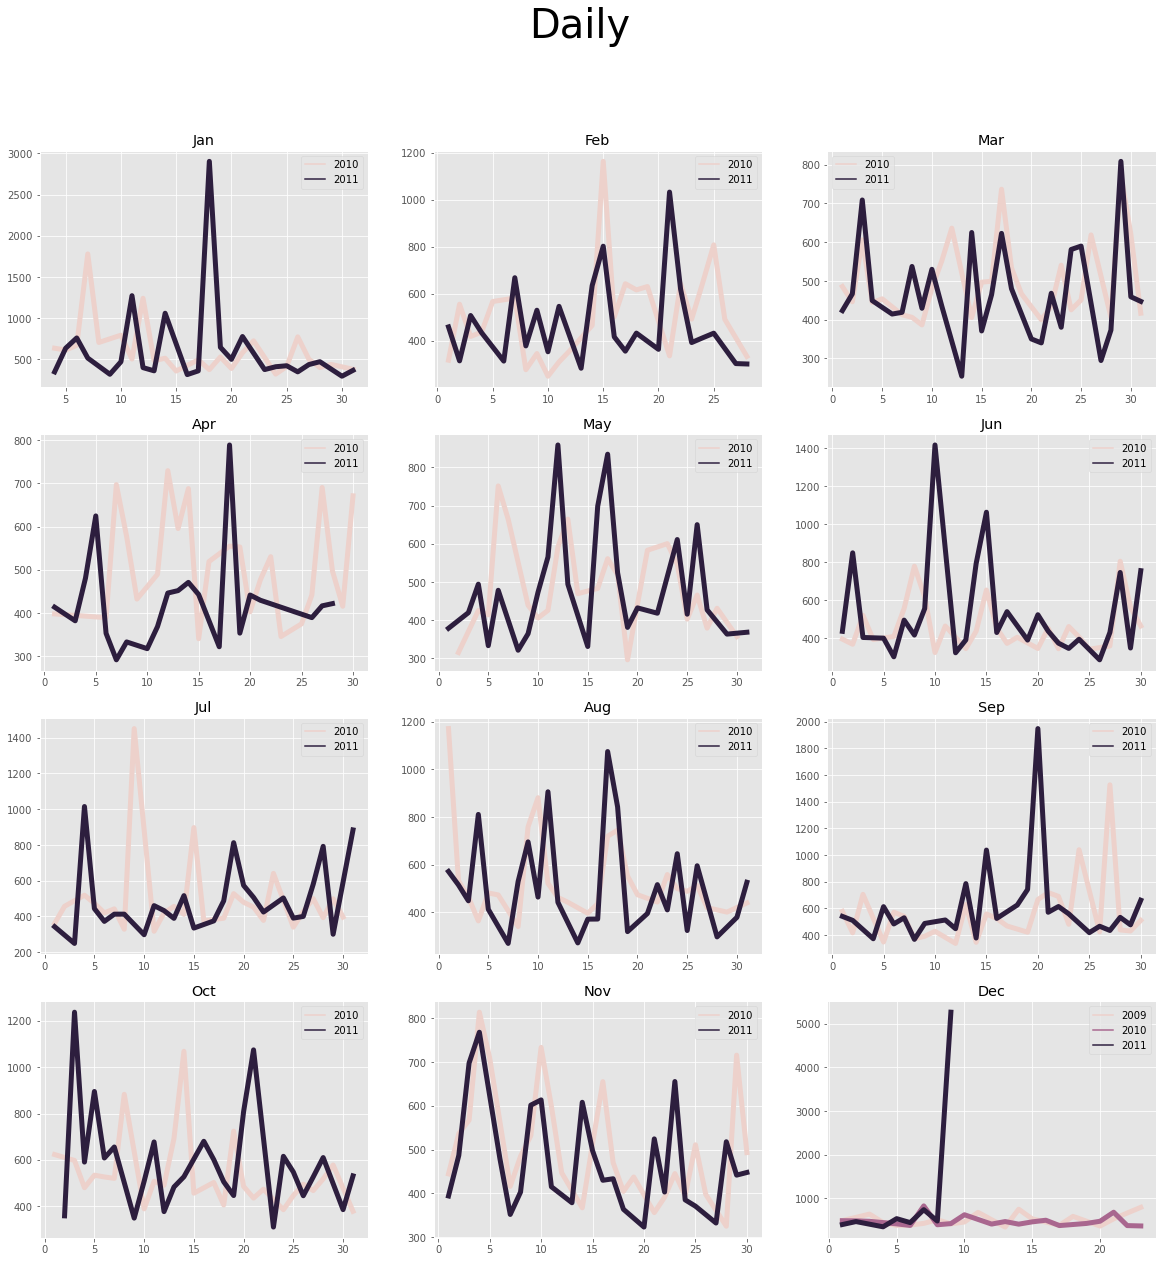

In [30]:
plt.style.use('ggplot')
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Daily', fontsize=40)

column_idx = 1
var_list = ["","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i in range(4):
    for j in range(3):
        df = DARPPU_df[DARPPU_df['month'] == column_idx]
        sns.lineplot(x=df['day'], y=df['DARPU'], hue=df['year'], linewidth=5, ax = ax[i][j])
        ax[i][j].set_xlabel('')
        ax[i][j].set_ylabel('')
        ax[i][j].set_title(var_list[column_idx])
        ax[i][j].legend()
        column_idx += 1
plt.show();

- ASP(Average Selling Price)

In [31]:
ASP = data.groupby(['year','month']).sum()['total_price'] / data.groupby(['year','month']).sum()['Quantity']
ASP_df = ASP.to_frame().reset_index().rename(columns={0 : 'ASP'})
ASP_df

,year,month,ASP
0,2009,12,1.701016
1,2010,1,1.442776
2,2010,2,1.339774
3,2010,3,1.328517
4,2010,4,1.671568
5,2010,5,1.541146
6,2010,6,1.614833
7,2010,7,1.792392
8,2010,8,1.314886
9,2010,9,1.419730


<AxesSubplot:xlabel='month', ylabel='ASP'>

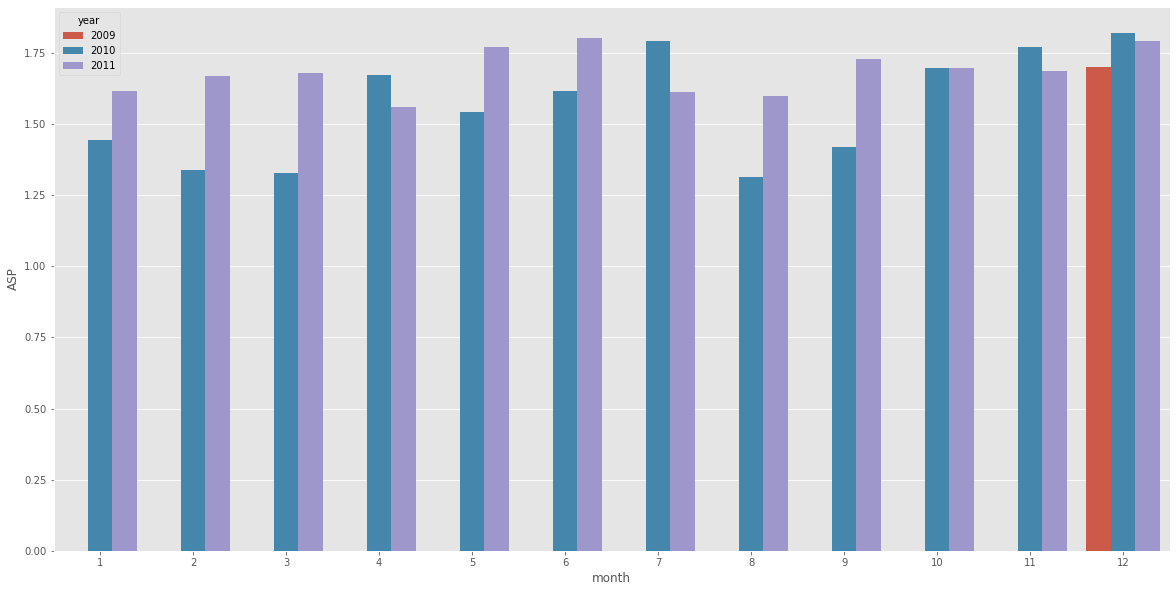

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x=ASP_df['month'], y=ASP_df['ASP'], hue=ASP_df['year'])

- RFM analysis
    - Recency (affects retention, a measure of engagement)
    - Frequency (affects a customer’s lifetime value)
    - Monetary (affects a customer’s lifetime value)
    - Segment :
        - Champions: Bought recently, buy often and spend the most
        - Loyal customers: Buy on a regular basis. Responsive to promotions.
        - Potential loyalist: Recent customers with average frequency.
        - Recent customers: Bought most recently, but not often.
        - Promising: Recent shoppers, but haven’t spent much.
        - Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.
        - About to sleep: Below average recency and frequency. Will lose them if not reactivated.
        - At risk: Some time since they’ve purchased. Need to bring them back!
        - Can’t loose them: Used to purchase frequently but haven’t returned for a long time.
        - Hibernating: Last purchase was long back and low number of orders. May be lost.

In [33]:
# 기준 날짜 : 2011년 12월 10일 -> 가장 마지막 거래가 이루어진 날짜가 2011년 12월 9일이기 때문
standard_date = dt.datetime(2011, 12, 10)
RFM = data.groupby('Customer ID').agg({'date' : lambda date : (standard_date - date.max()).days,
                                'Invoice' : lambda Invoice : Invoice.nunique(),
                                'total_price' : lambda total_price : total_price.sum()})

In [34]:
RFM = RFM.reset_index()
RFM = RFM.rename(columns = {'date' : 'recency',
                     'Invoice' : 'frequency',
                     'total_price' : 'monetary'})

In [35]:
RFM[RFM['monetary'] < 0]

,Customer ID,recency,frequency,monetary


In [36]:
# RFM Scores
RFM['R'] = pd.qcut(RFM['recency'], 5, labels=[5,4,3,2,1])
# 같은 개수로 나누고 싶은데 중복값이 있을 경우
RFM['F'] = pd.qcut(RFM['frequency'].rank(method="first"), 5, labels=[5,4,3,2,1])
RFM['M'] = pd.qcut(RFM['monetary'], 5, labels=[5,4,3,2,1])

In [37]:
# segment
# R,F 점수 이용
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t loose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
RFM['segment'] = RFM['R'].astype(str) + RFM['F'].astype(str)
RFM['segment'] = RFM['segment'].replace(segment_map, regex=True)

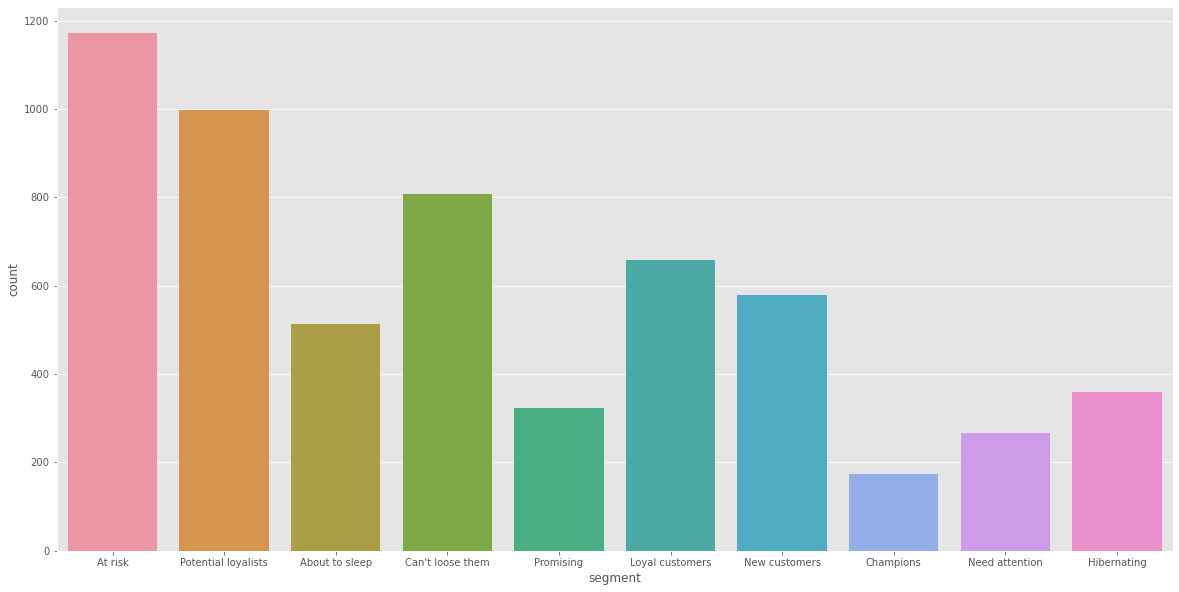

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(RFM['segment'])
plt.show();

In [39]:
RFM['segment'].unique()

array(['At risk', 'Potential loyalists', 'About to sleep',
       "Can't loose them", 'Promising', 'Loyal customers',
       'New customers', 'Champions', 'Need attention', 'Hibernating'],
      dtype=object)

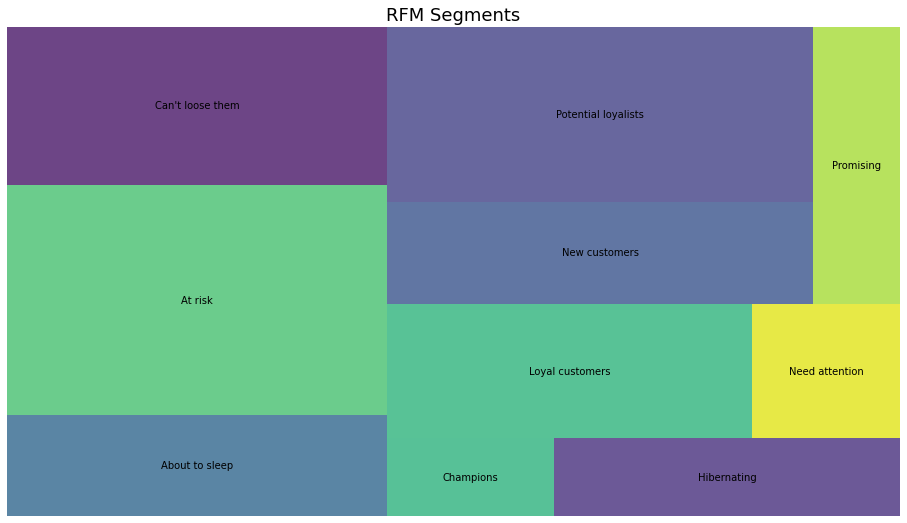

In [40]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
# color = 

squarify.plot(sizes=RFM.groupby('segment').count()['Customer ID'],
             label=RFM.groupby('segment').count()['Customer ID'].index,
             alpha=0.8)
plt.title("RFM Segments", fontsize=18)
plt.axis("off")
plt.show()

In [41]:
RFM_data = pd.merge(data, RFM, how="left")
RFM_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,...,quarter,weekday,total_price,recency,frequency,monetary,R,F,M,segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,2009-12-01,7:45,...,4,Tuesday,83.40,158,8,2433.28,3,2,2,About to sleep
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,...,4,Tuesday,81.00,158,8,2433.28,3,2,2,About to sleep
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,...,4,Tuesday,81.00,158,8,2433.28,3,2,2,About to sleep
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,2009-12-01,7:45,...,4,Tuesday,100.80,158,8,2433.28,3,2,2,About to sleep
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,2009-12-01,7:45,...,4,Tuesday,30.00,158,8,2433.28,3,2,2,About to sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776632,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09,12:50,...,4,Friday,10.20,1,4,790.81,5,3,3,Potential loyalists
776633,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09,12:50,...,4,Friday,12.60,1,4,790.81,5,3,3,Potential loyalists
776634,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,...,4,Friday,16.60,1,4,790.81,5,3,3,Potential loyalists
776635,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,...,4,Friday,16.60,1,4,790.81,5,3,3,Potential loyalists


<AxesSubplot:xlabel='segment', ylabel='recency'>

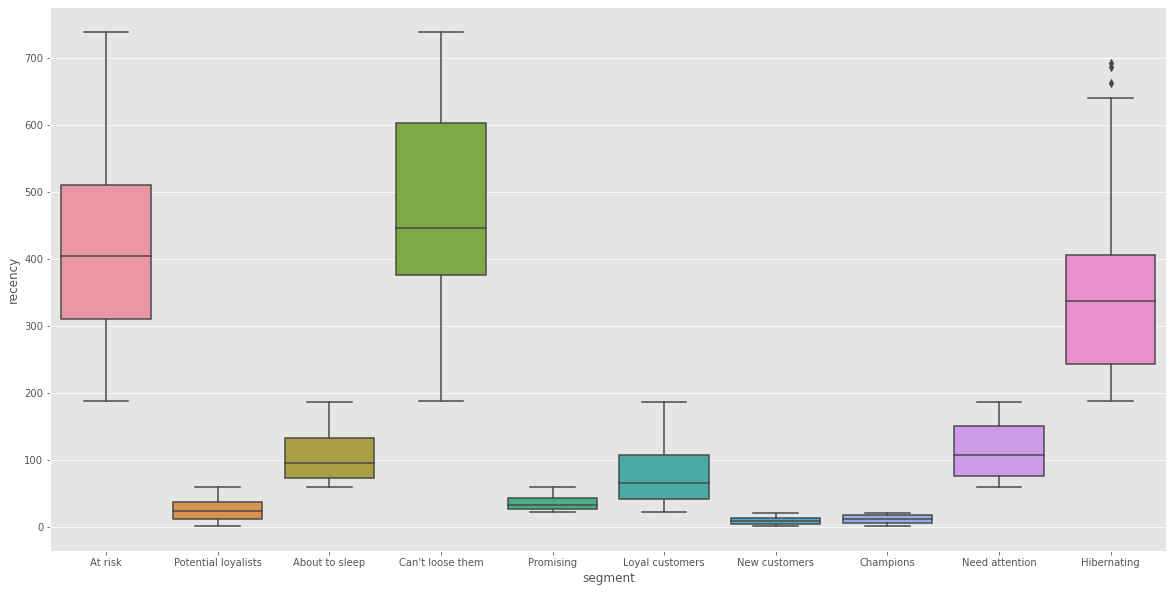

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x=RFM['segment'], y=RFM['recency'])

In [43]:
b = RFM_data.groupby(['segment','Country']).count()['Customer ID'].to_frame().reset_index()
b_pivot = b.pivot("segment","Country","Customer ID")
b_pivot = b_pivot.fillna("0")
b_pivot = b_pivot.astype(int)

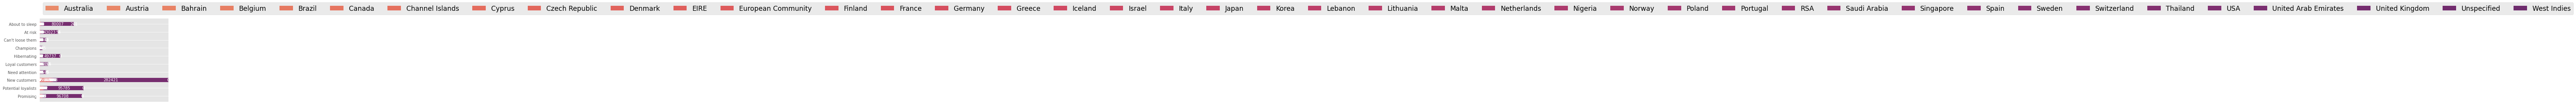

In [44]:
category_names = list(b_pivot.columns)
labels = list(b_pivot.index)
data = b_pivot.values
data_cum = data.cumsum(axis=1)
category_colors = sns.color_palette("flare", as_cmap=True)(np.linspace(0.15, 0.85, data.shape[1]))
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)

ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='xx-large')

<AxesSubplot:xlabel='segment'>

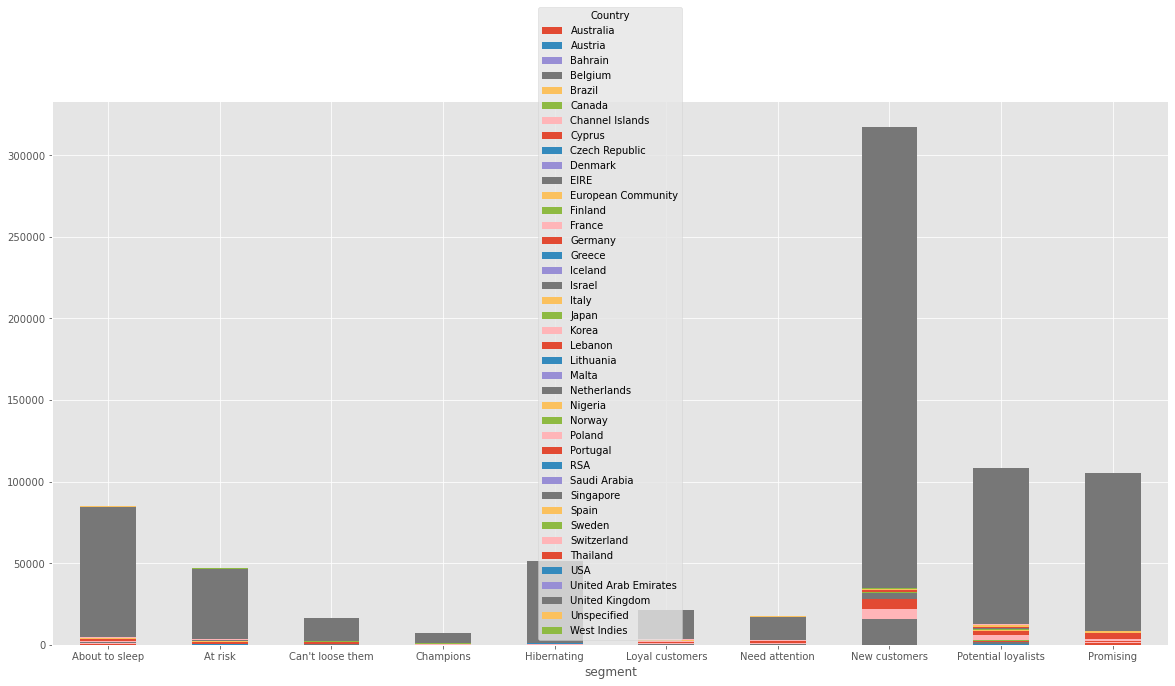

In [73]:
b_pivot.plot.bar(stacked=True, rot=0, figsize=(20,10))

In [45]:
at_risk = RFM_data[RFM_data['segment'] == 'At risk']
potential_loyalists = RFM_data[RFM_data['segment'] == 'Potential loyalists']
about_to_sleep = RFM_data[RFM_data['segment'] == 'About to sleep']
cant_loose_them = RFM_data[RFM_data['segment'] == "Can't loose them"]
promising = RFM_data[RFM_data['segment'] == "Promising"]
loyal_customers = RFM_data[RFM_data['segment'] == "Loyal customers"]
new_customers = RFM_data[RFM_data['segment'] == "New customers"]
champions = RFM_data[RFM_data['segment'] == "Champions"]
need_attention = RFM_data[RFM_data['segment'] == "Need attention"]
hibernating = RFM_data[RFM_data['segment'] == "Hibernating"]

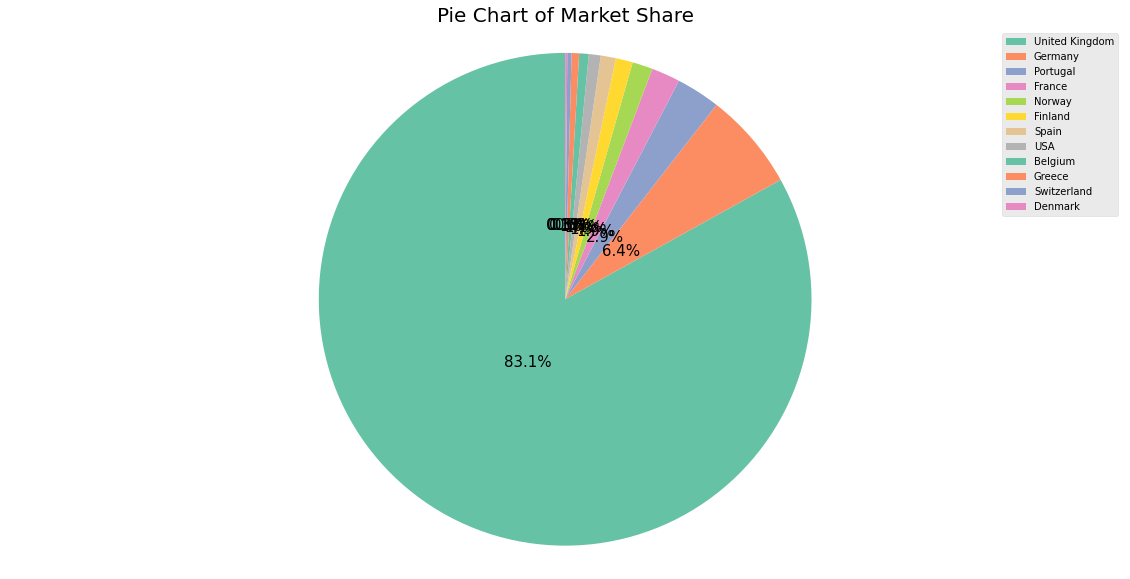

In [72]:
plt.figure(figsize=(20,10))
plt.pie(champions['Country'].value_counts(),
        autopct='%0.1f%%',
        textprops={'fontsize': 15},
        pctdistance=0.3,
        startangle=90,
        colors=sns.color_palette("Set2"))
plt.axis('equal') #  equal length of X and Y axis
plt.legend(labels=champions['Country'].value_counts().index)
plt.title('Pie Chart of Market Share', fontsize=20)

plt.show();

In [47]:
champions['Country'].count()

7170

In [48]:
pd.DataFrame(champions['Country'].value_counts() / champions['Country'].count() * 100)

,Country
United Kingdom,83.054393
Germany,6.415621
Portugal,2.887029
France,1.882845
Norway,1.338912
Finland,1.115760
Spain,0.990237
USA,0.781032
Belgium,0.627615
Greece,0.488145


In [ ]:
champions['Country'].value_counts().index

In [ ]:
# champions
sns.countplot(champions['Country'])

In [ ]:
# 아웃라이어
plt.figure(figsize=(20,30))
sns.boxplot(x=RFM['segment'], y=RFM['monetary'])

In [ ]:
# 아웃라이어
plt.figure(figsize=(20,30))
sns.boxplot(x=RFM['segment'], y=RFM['frequency'])

In [ ]:
RFM

In [ ]:
RFM_tmp = RFM[RFM['monetary'] < 100000]

In [ ]:
plt.figure(figsize=(20,30))
sns.boxplot(x=RFM_tmp['segment'], y=RFM_tmp['monetary'])

In [ ]:
plt.figure(figsize=(20,30))
sns.boxplot(RFM[RFM['segment'] == 'At risk']['monetary'])

In [ ]:
RFM.describe()

In [ ]:
RFM[RFM['segment'] == 'At risk']['monetary']

In [ ]:
sns.boxplot(x=RFM['segment'], y=RFM['monetary'])

In [ ]:
RFM[RFM['segment'] == 'At risk'].describe()

In [ ]:
at_risk['monetary'].value_counts()

In [ ]:
tmp = RFM_data.copy()

In [ ]:
quartile1 = tmp['monetary'].quantile(0.01)
quartile3 = tmp['monetary'].quantile(0.99)

In [ ]:
quartile1, quartile3

In [ ]:
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range

In [ ]:
up_limit, low_limit

In [ ]:
tmp.loc[(tmp['monetary'] < low_limit), ['monetary']] = low_limit
tmp.loc[(tmp['monetary'] > up_limit), ['monetary']] = up_limit

In [ ]:
tmp